# Generate Data

In [40]:
from ucimlrepo import fetch_ucirepo 
  
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
           "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

adult_df = pd.read_csv(url, names=columns, na_values=" ?", sep=",\s", engine='python')
adult_df = adult_df.sample(5000)

import pandas as pd
import numpy as np
from ForestDiffusion import ForestDiffusionModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_features = ['workclass', 'education', 'marital-status','occupation','relationship','race','sex', 'native-country']
for feature in categorical_features:
    le = LabelEncoder()
    adult_df[feature] = le.fit_transform(adult_df[feature].astype(str))
    label_encoders[feature] = le

target_encoder = LabelEncoder()
adult_df['income'] = target_encoder.fit_transform(adult_df['income'].astype(str))

# Ensure all columns are of numeric type
adult_df = adult_df.apply(pd.to_numeric)

# Define features and target
X = adult_df.drop(columns=['income'])
y = adult_df['income']

# Create train and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
Xy = np.concatenate((X_train, np.expand_dims(y_train, axis=1)), axis=1)
Xy_holdout = np.concatenate((X_holdout, np.expand_dims(y_holdout, axis=1)), axis=1)

# Classification problem (outcome is categorical)
cat_indexes = [X.columns.get_loc(col) for col in categorical_features]  # indexes of categorical features
forest_model = ForestDiffusionModel(X_train.values, label_y=y_train.values, n_t=10, duplicate_K=25, bin_indexes=[], cat_indexes=cat_indexes, int_indexes=[], diffusion_type='flow', n_jobs=-1)
Xy_fake = forest_model.generate(batch_size=X_train.shape[0])  # last variable will be the label_y

columns = X.columns.tolist() + ['income']

# Convert the numpy array to a pandas DataFrame
df_fake_a = pd.DataFrame(Xy_fake, columns=columns).round(1)
# Convert the numpy array to a pandas DataFrame
df_original_a = pd.DataFrame(Xy, columns=columns)
# Convert the numpy array to a pandas DataFrame
df_holdout_a = pd.DataFrame(Xy_holdout, columns=columns)

In [21]:
adult_df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32561 rows x 15 columns]

In [16]:
from ucimlrepo import fetch_ucirepo 
  
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
           "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

adult_df = pd.read_csv(url, names=columns, na_values=" ?", sep=",\s", engine='python')

In [8]:
from ucimlrepo import fetch_ucirepo 
  
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
           "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

adult_df = pd.read_csv(url, names=columns, na_values=" ?", sep=",\s", engine='python')


In [9]:
adult_df.shape

(32561, 15)

In [6]:
# export adult_df to csv
adult_df.to_csv('adult_df.csv', index=False)

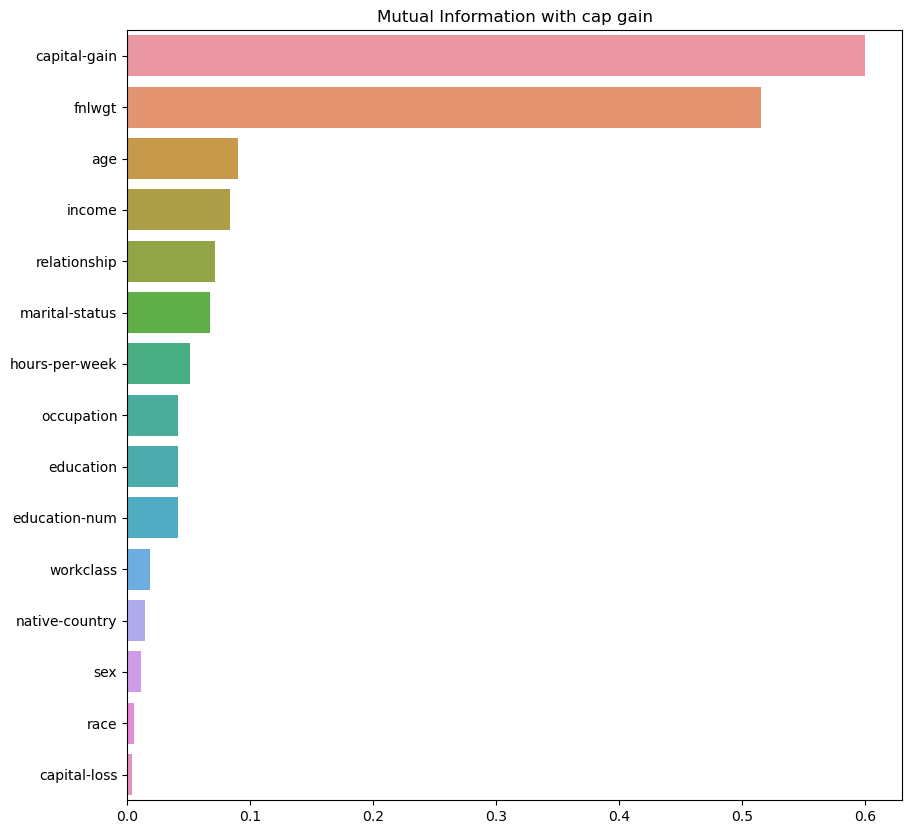

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# calculate correlation matrix using mutual information
from sklearn.metrics import mutual_info_score
mi = adult_df.apply(lambda x: mutual_info_score(x, adult_df['capital-gain']), axis=0)

mi = mi.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(x=mi, y=mi.index)
plt.title('Mutual Information with cap gain')
plt.show()



In [28]:
import pandas as pd
import numpy as np
from ForestDiffusion import ForestDiffusionModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_features = ['workclass', 'education', 'marital-status','occupation','relationship','race','sex', 'native-country', 'income']
for feature in categorical_features:
    le = LabelEncoder()
    adult_df[feature] = le.fit_transform(adult_df[feature])
    label_encoders[feature] = le



In [46]:
# save the dataframes to csv files
df_fake_a.to_csv('adult_fake.csv', index=False)
df_original_a.to_csv('adult_original.csv', index=False)
df_holdout_a.to_csv('adult_holdout.csv', index=False)

In [38]:
from ucimlrepo import fetch_ucirepo 
  
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
           "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

adult_df = pd.read_csv(url, names=columns, na_values=" ?", sep=",\s", engine='python')

import pandas as pd
import numpy as np
from ForestDiffusion import ForestDiffusionModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_features = ['workclass', 'education', 'marital-status','occupation','relationship','race','sex', 'native-country']
for feature in categorical_features:
    le = LabelEncoder()
    adult_df[feature] = le.fit_transform(adult_df[feature].astype(str))
    label_encoders[feature] = le

target_encoder = LabelEncoder()
adult_df['income'] = target_encoder.fit_transform(adult_df['income'].astype(str))

# Ensure all columns are of numeric type
adult_df = adult_df.apply(pd.to_numeric)

# train an xgboost model and make predictions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = adult_df.drop(columns=['income'])
y = adult_df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 87.52%
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.77      0.68      0.72      1571

    accuracy                           0.88      6513
   macro avg       0.84      0.81      0.82      6513
weighted avg       0.87      0.88      0.87      6513



In [42]:
# train an xgboost model and make predictions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

adult_df = df_fake_a
X = adult_df.drop(columns=['income'])
y = adult_df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 90.75%
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       599
         1.0       0.83      0.80      0.81       201

    accuracy                           0.91       800
   macro avg       0.88      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



In [43]:
# train an xgboost model and make predictions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

adult_df = df_original_a
X = adult_df.drop(columns=['income'])
y = adult_df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 86.88%
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       614
           1       0.77      0.62      0.69       186

    accuracy                           0.87       800
   macro avg       0.83      0.78      0.80       800
weighted avg       0.86      0.87      0.86       800



In [44]:
# train an xgboost model and make predictions
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

adult_df = df_holdout_a
X = adult_df.drop(columns=['income'])
y = adult_df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 86.00%
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       156
           1       0.72      0.59      0.65        44

    accuracy                           0.86       200
   macro avg       0.81      0.76      0.78       200
weighted avg       0.85      0.86      0.85       200



In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
           "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

df = pd.read_csv(url, names=columns, na_values=" ?", sep=",\s", engine='python')

# Handle missing values
df = df.dropna()

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into training and testing sets
X = df.drop("income", axis=1)
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.8751727314601566,
 '              precision    recall  f1-score   support\n\n           0       0.90      0.94      0.92      4942\n           1       0.77      0.68      0.72      1571\n\n    accuracy                           0.88      6513\n   macro avg       0.84      0.81      0.82      6513\nweighted avg       0.87      0.88      0.87      6513\n')

In [ ]:
from ForestDiffusion import ForestDiffusionModel
import pandas as pd

from sklearn.model_selection import train_test_split
X, y = my_data['data'], my_data['target']
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
Xy = np.concatenate((X_train, np.expand_dims(y_train, axis=1)), axis=1)
Xy_holdout = np.concatenate((X_holdout, np.expand_dims(y_holdout, axis=1)), axis=1)

# Classification problem (outcome is categorical)
forest_model = ForestDiffusionModel(X_train, label_y=y_train, n_t=30, duplicate_K=70, bin_indexes=[], cat_indexes=[], int_indexes=[], diffusion_type='flow', n_jobs=-1)
Xy_fake = forest_model.generate(batch_size=X_train.shape[0]) # last variable will be the label_y

columns = my_data.feature_names + ['target']

# Convert the numpy array to a pandas DataFrame
df_fake = pd.DataFrame(Xy_fake, columns=columns).round(1)
# Convert the numpy array to a pandas DataFrame
df_original = pd.DataFrame(Xy, columns=columns)
# Convert the numpy array to a pandas DataFrame
df_holdout = pd.DataFrame(Xy_holdout, columns=columns)

In [7]:
df_fake.head()

pclass  sex   age  sibsp  parch   fare  embarked  class  who  adult_male  \
0     1.0  0.0  36.7    1.0    1.8  100.9       0.0    0.0  2.0         0.0   
1     1.0  1.0  44.7    1.0    1.0   68.2       2.0    0.0  1.0         1.0   
2     1.0  1.0  47.1    0.0    0.0   35.1       2.0    0.0  1.0         1.0   
3     1.0  0.0  33.0    1.0    1.1  120.8       0.0    0.0  2.0         0.0   
4     1.0  1.0  24.7    0.0    1.5   48.9       2.0    0.0  2.0         0.0   

   deck  embark_town  alive  alone  survived  
0   1.0          0.0    1.0    0.0       1.0  
1   0.0          2.0    0.0    0.0       0.0  
2   4.0          2.0    0.0    1.0       0.0  
3   0.0          0.0    1.0    0.0       1.0  
4   4.0          2.0    1.0    0.0       1.0

In [13]:
import pandas as pd
# read the dataframes from csv files
df_fake_a = pd.read_csv('adult_fake.csv')
df_original_a = pd.read_csv('adult_original.csv')
df_holdout_a = pd.read_csv('adult_holdout.csv')

In [38]:
df_fake_a

age  workclass    fnlwgt  education  education-num  marital-status  \
0     47.0        4.0  210495.9       15.0            9.0             0.0   
1     46.9        4.0  267970.2       15.0            9.9             2.0   
2     19.9        4.0  199113.5       15.0           10.0             4.0   
3     21.4        4.0  143013.0       15.0            9.0             4.0   
4     22.2        4.0  240603.6       15.0            9.2             4.0   
...    ...        ...       ...        ...            ...             ...   
3995  28.7        4.0  349416.1       15.0           10.0             4.0   
3996  62.9        4.0  247061.2       15.0            5.5             2.0   
3997  52.2        4.0  113454.9       15.0           11.0             6.0   
3998  43.0        1.0   81064.9       15.0            8.8             2.0   
3999  47.6        4.0  288457.7       15.0            5.0             0.0   

      occupation  relationship  race  sex  capital-gain  capital-loss  \
0            7.0           4.0   4.0  0.0          65.9           0.4   
1            6.0           0.0   4.0  1.0         163.5           0.4   
2           11.0           3.0   4.0  0.0           0.0           2.5   
3            0.0           3.0   4.0  1.0          39.5           0.0   
4            5.0           1.0   4.0  1.0         147.2           0.0   
...          ...           ...   ...  ...           ...           ...   
3995         1.0           1.0   2.0  1.0           7.2           0.0   
3996         5.0           0.0   4.0  1.0         616.4           0.0   
3997         7.0           0.0   0.0  1.0          65.7        1883.3   
3998         3.0           0.0   4.0  0.0        5484.2           0.0   
3999         5.0           4.0   4.0  0.0          50.0           0.2   

      hours-per-week  native-country  income  
0               37.2            38.0     0.0  
1               52.5            38.0     0.0  
2               16.2            38.0     0.0  
3               50.1            38.0     0.0  
4               42.2            38.0     0.0  
...              ...             ...     ...  
3995            38.8            38.0     0.0  
3996            39.3            26.0     0.0  
3997            29.5            38.0     0.0  
3998            40.3            38.0     1.0  
3999            37.7            38.0     0.0  

[4000 rows x 15 columns]

In [36]:
# reverse the encoding
for feature in categorical_features:
    le = label_encoders[feature]
    df_fake_a[feature] = le.inverse_transform(df_fake_a[feature])

IndexError: arrays used as indices must be of integer (or boolean) type

In [37]:
df_fake_a['native-country'].value_counts()

38.0    3689
0.0      188
25.0      56
21.0       7
32.0       7
2.0        6
11.0       5
8.0        5
29.0       4
9.0        4
6.0        4
30.0       3
22.0       3
23.0       3
35.0       2
34.0       2
13.0       2
39.0       2
19.0       2
26.0       2
18.0       1
24.0       1
4.0        1
5.0        1
Name: native-country, dtype: int64

In [16]:
adult_df

age         workclass  fnlwgt     education  education-num  \
32255   19           Private   57145       HS-grad              9   
20902   34           Private   90614    Assoc-acdm             12   
26741   46           Private   73434       Masters             14   
1627    52           Private  147876     Bachelors             13   
25556   25         State-gov   99076     Bachelors             13   
...    ...               ...     ...           ...            ...   
1959    32           Private  190511  Some-college             10   
11777   55         State-gov  200497       Masters             14   
25530   29      Self-emp-inc  156815       HS-grad              9   
21964   37           Private  348796     Bachelors             13   
30178   62  Self-emp-not-inc  197353       HS-grad              9   

           marital-status       occupation   relationship   race     sex  \
32255       Never-married    Other-service      Own-child  White  Female   
20902  Married-civ-spouse     Tech-support        Husband  White    Male   
26741            Divorced  Exec-managerial  Not-in-family  White  Female   
1627   Married-civ-spouse            Sales           Wife  White  Female   
25556       Never-married    Other-service  Not-in-family  White  Female   
...                   ...              ...            ...    ...     ...   
1959   Married-civ-spouse  Exec-managerial        Husband  White    Male   
11777  Married-civ-spouse  Exec-managerial        Husband  White    Male   
25530  Married-civ-spouse    Other-service        Husband  White    Male   
21964            Divorced    Other-service  Not-in-family  White    Male   
30178  Married-civ-spouse     Craft-repair        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
32255             0             0              25  United-States  <=50K  
20902             0          2042              10  United-States  <=50K  
26741             0             0              45  United-States  <=50K  
1627          15024             0              60  United-States   >50K  
25556          2597             0              50  United-States  <=50K  
...             ...           ...             ...            ...    ...  
1959              0             0              40  United-States   >50K  
11777             0             0              45  United-States   >50K  
25530             0             0              40  United-States  <=50K  
21964             0             0              40  United-States  <=50K  
30178             0          1740              40  United-States  <=50K  

[5000 rows x 15 columns]

# SynthAssess

In [2]:
from SynthAssess.visualisation.visualisation import Visualisation

# Create a Visualisation object
vis = Visualisation(df_original_a, df_fake_a, df_holdout_a)
vis.create_plotly_scatter_comparison_with_dropdowns()

In [14]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_original)

from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(
    metadata,
    enforce_rounding=True,
    epochs=500,
    verbose=True
)

synthesizer.fit(df_original)

/Users/emilioguerra/anaconda3/envs/vitality/lib/python3.11/site-packages/sdv/single_table/base.py:82: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.

Gen. (-0.67) | Discrim. (-0.02): 100%|██████████| 500/500 [02:15<00:00,  3.69it/s]


In [15]:
synthetic_data = synthesizer.sample(num_rows=len(df_original))

In [6]:
synthetic_data

age  workclass  fnlwgt  education  education-num  marital-status  \
0      54          2   90196         11              9               0   
1      76          4  329193         15             13               6   
2      37          4  114315         12             13               6   
3      48          1  196208          6             12               2   
4      31          0  299671         11              9               0   
...   ...        ...     ...        ...            ...             ...   
3995   62          0  125802         12              9               4   
3996   45          4  131919         11              9               0   
3997   42          4  183516          9             13               0   
3998   53          2  256810         15             10               2   
3999   23          4  200311         11              9               4   

      occupation  relationship  race  sex  capital-gain  capital-loss  \
0              1             4     4    0             0             0   
1              2             4     4    0          3872             0   
2              0             1     3    0             0             0   
3              0             0     4    1             0             0   
4              1             4     4    0             0             1   
...          ...           ...   ...  ...           ...           ...   
3995           6             4     4    0             0             1   
3996           7             4     4    0            64             2   
3997           9             1     4    0             0             5   
3998           6             5     4    1             5             0   
3999          13             1     4    1             0             0   

      hours-per-week  native-country  income  data_label  
0                 35              38       0           0  
1                 49               3       1           0  
2                 35               3       0           0  
3                 40              38       0           0  
4                 35              38       0           0  
...              ...             ...     ...         ...  
3995              40              38       0           0  
3996              36              38       0           0  
3997              40              38       0           0  
3998              40              38       0           0  
3999              20               4       0           0  

[4000 rows x 16 columns]

In [21]:
fig = synthesizer.get_loss_values_plot()
fig.show()

In [1]:
# save the dataframes to csv files
synthetic_data.to_csv('adult_fake.csv', index=False)
df_original.to_csv('adult_original.csv', index=False)
import pandas as pd
df_fake = pd.read_csv('adult_fake.csv')
df_original = pd.read_csv('adult_original.csv')
df_holdout = pd.read_csv('adult_holdout.csv')

In [10]:
from anonymeter.evaluators import SinglingOutEvaluator
from anonymeter.evaluators import LinkabilityEvaluator
from anonymeter.evaluators import InferenceEvaluator

evaluator = SinglingOutEvaluator(ori=df_original , syn= df_fake, control= df_holdout, n_attacks= 100)
evaluator.evaluate()
evaluator.risk(confidence_level=0.95)
res = evaluator.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

Found 78 failed queries out of 100. Check DEBUG messages for more details.


PrivacyRisk(value=0.16720090497766973, ci=(0.0739840923873495, 0.26041771756799))

In [22]:
evaluatorCT = SinglingOutEvaluator(ori=df_original , syn= synthetic_data, control= df_holdout, n_attacks= 100)
evaluatorCT.evaluate()
evaluatorCT.risk(confidence_level=0.95)

Found 78 failed queries out of 100. Check DEBUG messages for more details.


PrivacyRisk(value=0.17959893015948591, ci=(0.09411206350650325, 0.2650857968124686))

In [23]:
resCT = evaluatorCT.results()

print("Successs rate of main attack:", resCT.attack_rate)
print("Successs rate of baseline attack:", resCT.baseline_rate)
print("Successs rate of control attack:", resCT.control_rate)

Successs rate of main attack: SuccessRate(value=0.2110980494620957, error=0.07773111613106319)
Successs rate of baseline attack: SuccessRate(value=0.01849674910349284, error=0.01849674910349284)
Successs rate of control attack: SuccessRate(value=0.03839478087069444, error=0.0326039564762892)


In [12]:
res = evaluator.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

Successs rate of main attack: SuccessRate(value=0.22072811448002586, error=0.07907157386087281)
Successs rate of baseline attack: SuccessRate(value=0.01849674910349284, error=0.01849674910349284)
Successs rate of control attack: SuccessRate(value=0.0642738564706544, error=0.04421635018656125)


In [33]:
# df_fake to integers
df_fake = df_fake.astype(int)
df_fake

age  workclass  fnlwgt  education  education-num  marital-status  \
0      47          4  210495         15              9               0   
1      46          4  267970         15              9               2   
2      19          4  199113         15             10               4   
3      21          4  143013         15              9               4   
4      22          4  240603         15              9               4   
...   ...        ...     ...        ...            ...             ...   
3995   28          4  349416         15             10               4   
3996   62          4  247061         15              5               2   
3997   52          4  113454         15             11               6   
3998   43          1   81064         15              8               2   
3999   47          4  288457         15              5               0   

      occupation  relationship  race  sex  capital-gain  capital-loss  \
0              7             4     4    0            65             0   
1              6             0     4    1           163             0   
2             11             3     4    0             0             2   
3              0             3     4    1            39             0   
4              5             1     4    1           147             0   
...          ...           ...   ...  ...           ...           ...   
3995           1             1     2    1             7             0   
3996           5             0     4    1           616             0   
3997           7             0     0    1            65          1883   
3998           3             0     4    0          5484             0   
3999           5             4     4    0            50             0   

      hours-per-week  native-country  income  
0                 37              38       0  
1                 52              38       0  
2                 16              38       0  
3                 50              38       0  
4                 42              38       0  
...              ...             ...     ...  
3995              38              38       0  
3996              39              26       0  
3997              29              38       0  
3998              40              38       1  
3999              37              38       0  

[4000 rows x 15 columns]

In [34]:
df_original

age  workclass  fnlwgt  education  education-num  marital-status  \
0      18          4  274057          1              7               4   
1      24          2  161092         11              9               4   
2      50          1  176969         11              9               0   
3      39          4  147548         11              9               2   
4      23          4   27776          8             11               4   
...   ...        ...     ...        ...            ...             ...   
3995   69          7   34339         11              9               2   
3996   46          4  233511          9             13               0   
3997   27          4  168107          9             13               2   
3998   55          4  147989         15             10               2   
3999   51          4  147200         11              9               4   

      occupation  relationship  race  sex  capital-gain  capital-loss  \
0              7             3     2    1             0             0   
1              7             3     4    1             0             0   
2              9             1     4    1             0          1590   
3              2             0     4    1             0             0   
4              6             1     4    1             0             0   
...          ...           ...   ...  ...           ...           ...   
3995          10             0     4    1             0             0   
3996           2             1     4    1             0             0   
3997           2             0     4    1             0             0   
3998           2             0     4    1          5013             0   
3999           1             1     2    0             0             0   

      hours-per-week  native-country  income  
0                  8              38       0  
1                 40              38       0  
2                 40              38       0  
3                 40              38       0  
4                 40              38       0  
...              ...             ...     ...  
3995              40              38       0  
3996              48              38       0  
3997              40              38       0  
3998              52              38       0  
3999              40              38       0  

[4000 rows x 15 columns]

In [ ]:
# test train split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train, test = train_test_split(df_original, test_size=0.2, random_state=42)

In [3]:
assessor.generate_report(report_name='regression_report.html', privacy=False)

Generating report...
Report generated.
Report saved to regression_report.html


In [4]:
assessor.visualisation.plot_all_column_distributions()

In [1]:
import pandas as pd
df_fake = pd.read_csv('adult_fake.csv')
df_original = pd.read_csv('adult_original.csv')
df_holdout = pd.read_csv('adult_holdout.csv')

In [2]:
from SynthAssess.SynthAssessor import SynthAssessor
assessor=SynthAssessor(df_original, df_fake, df_holdout, target_type='classification', target_column='income')

In [3]:
assessor.generate_report(report_name='forest_classification.html')

Generating report...


Found 41 failed queries out of 50. Check DEBUG messages for more details.


No auxiliary columns provided. Please define auxiliary columns.


/Users/emilioguerra/anaconda3/envs/vitality/lib/python3.11/site-packages/anonymeter/stats/confidence.py:218: UserWarning:

Attack is as good or worse as baseline model. Estimated rates: attack = 0.21907914589292654, baseline = 0.22505618534201322. Analysis results cannot be trusted.

/Users/emilioguerra/anaconda3/envs/vitality/lib/python3.11/site-packages/anonymeter/stats/confidence.py:218: UserWarning:

Attack is as good or worse as baseline model. Estimated rates: attack = 0.7430662709295245, baseline = 0.7719552949334434. Analysis results cannot be trusted.

/Users/emilioguerra/anaconda3/envs/vitality/lib/python3.11/site-packages/anonymeter/stats/confidence.py:218: UserWarning:

Attack is as good or worse as baseline model. Estimated rates: attack = 0.22804470506655655, baseline = 0.229040878308071. Analysis results cannot be trusted.

/Users/emilioguerra/anaconda3/envs/vitality/lib/python3.11/site-packages/anonymeter/stats/confidence.py:218: UserWarning:

Attack is as good or worse

Report generated.
Report saved to forest_classification.html


In [3]:
distances = assessor.privacy_metrics.compute_average_knn_distance_return_distances()
fig, probability_score = assessor.privacy_metrics.generate_probability_matrix(knn_distances = distances)
fig

In [9]:
distances.shape

(20000, 5)

In [11]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import xgboost as xgb

def train_attack_model(train_data, train_labels):
    """
    Train an attack model using XGBoost.
    
    Parameters:
    - train_data: Training data.
    - train_labels: Labels for training data.
    
    Returns:
    - attack_model: Trained XGBoost model.
    """
    attack_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
    attack_model.fit(train_data, train_labels)
    return attack_model

def cross_validated_membership_inference(original_data, synthetic_data, holdout_data, n_folds=5):
    """
    Perform a membership inference attack using cross-validation for stability.
    
    Parameters:
    - original_data: The original dataset used for training the synthetic data generator.
    - synthetic_data: The synthetic dataset generated by a model trained on the original dataset.
    - holdout_data: A holdout dataset that was not used during the training of the synthetic data generator.
    - n_folds: Number of cross-validation folds.
    
    Returns:
    - attack_results: A dictionary containing attack metrics.
    """
    
    combined_data = np.vstack((synthetic_data, holdout_data))
    labels = np.hstack((np.ones(len(synthetic_data)), np.zeros(len(holdout_data))))
    
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    fold_accuracies = []
    fold_aucs = []
    
    all_predictions = np.zeros((len(original_data) + len(holdout_data), n_folds))
    
    for fold, (train_index, val_index) in enumerate(kf.split(combined_data)):
        train_data, val_data = combined_data[train_index], combined_data[val_index]
        train_labels, val_labels = labels[train_index], labels[val_index]
        
        attack_model = train_attack_model(train_data, train_labels)
        
        # Use the trained model to predict membership on original and holdout data
        inference_data = np.vstack((original_data, holdout_data))
        inference_labels = np.hstack((np.ones(len(original_data)), np.zeros(len(holdout_data))))
        
        val_predicted_probs = attack_model.predict_proba(inference_data)[:, 1]
        val_predictions = (val_predicted_probs > 0.5).astype(int)
        
        fold_accuracy = np.mean(val_predictions == inference_labels)
        fold_auc = roc_auc_score(inference_labels, val_predicted_probs)
        
        fold_accuracies.append(fold_accuracy)
        fold_aucs.append(fold_auc)
        
        all_predictions[:, fold] = val_predicted_probs
    
    # Average the predictions from all folds
    averaged_predictions = np.mean(all_predictions, axis=1)
    final_predictions = (averaged_predictions > 0.5).astype(int)
    
    # Calculate final attack metrics
    accuracy = np.mean(final_predictions == inference_labels)
    auc = roc_auc_score(inference_labels, averaged_predictions)
    
    attack_results = {
        'cross_val_accuracies': fold_accuracies,
        'cross_val_aucs': fold_aucs,
        'final_accuracy': accuracy,
        'final_auc': auc,
        'predictions': final_predictions,
        'true_labels': inference_labels,
        'predicted_probs': averaged_predictions
    }
    
    return attack_results
# Perform the membership inference attack with cross-validation
results = cross_validated_membership_inference(df_original, df_fake, df_holdout)

# Print the results
print("Cross-Validation Accuracies:", results['cross_val_accuracies'])
print("Cross-Validation AUCs:", results['cross_val_aucs'])
print(f"Final Attack Accuracy: {results['final_accuracy']}")
print(f"Final Attack AUC: {results['final_auc']}")


Cross-Validation Accuracies: [0.2308, 0.2276, 0.2296, 0.2302, 0.2336]
Cross-Validation AUCs: [0.5177689999999999, 0.522271875, 0.521279125, 0.517315875, 0.515876875]
Final Attack Accuracy: 0.2282
Final Attack AUC: 0.521322


In [12]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import xgboost as xgb

def train_attack_model(train_data, train_labels):
    """
    Train an attack model using XGBoost.
    
    Parameters:
    - train_data: Training data.
    - train_labels: Labels for training data.
    
    Returns:
    - attack_model: Trained XGBoost model.
    """
    attack_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
    attack_model.fit(train_data, train_labels)
    return attack_model

def cross_validated_ensemble_membership_inference(original_data, synthetic_data, holdout_data, n_folds=5):
    """
    Perform a membership inference attack using cross-validation for stability.
    
    Parameters:
    - original_data: The original dataset used for training the synthetic data generator.
    - synthetic_data: The synthetic dataset generated by a model trained on the original dataset.
    - holdout_data: A holdout dataset that was not used during the training of the synthetic data generator.
    - n_folds: Number of cross-validation folds.
    
    Returns:
    - attack_results: A dictionary containing attack metrics.
    """
    
    combined_data = np.vstack((synthetic_data, holdout_data))
    labels = np.hstack((np.ones(len(synthetic_data)), np.zeros(len(holdout_data))))
    
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    fold_predictions = []
    fold_true_labels = []
    
    for train_index, val_index in kf.split(combined_data):
        train_data, val_data = combined_data[train_index], combined_data[val_index]
        train_labels, val_labels = labels[train_index], labels[val_index]
        
        attack_model = train_attack_model(train_data, train_labels)
        
        # Use the trained model to predict membership on original and holdout data
        inference_data = np.vstack((original_data, holdout_data))
        inference_labels = np.hstack((np.ones(len(original_data)), np.zeros(len(holdout_data))))
        
        predicted_probs = attack_model.predict_proba(inference_data)[:, 1]
        
        fold_predictions.append(predicted_probs)
        fold_true_labels.append(inference_labels)
    
    # Ensemble the predictions from all folds
    ensemble_predictions = np.mean(fold_predictions, axis=0)
    final_predictions = (ensemble_predictions > 0.5).astype(int)
    
    # Calculate final attack metrics
    accuracy = np.mean(final_predictions == fold_true_labels[0])  # True labels are the same for each fold
    auc = roc_auc_score(fold_true_labels[0], ensemble_predictions)
    
    attack_results = {
        'final_accuracy': accuracy,
        'final_auc': auc,
        'predictions': final_predictions,
        'true_labels': fold_true_labels[0],
        'predicted_probs': ensemble_predictions
    }
    
    return attack_results


# Perform the membership inference attack with cross-validation
results = cross_validated_ensemble_membership_inference(df_original, df_fake, df_holdout)

# Print the results
print(f"Final Attack Accuracy: {results['final_accuracy']}")
print(f"Final Attack AUC: {results['final_auc']}")


Final Attack Accuracy: 0.2282
Final Attack AUC: 0.521322


In [3]:
assessor.generate_report(report_name='forest_diffusion_report.html')

Generating report...


Found 40 failed queries out of 50. Check DEBUG messages for more details.
/Users/emilioguerra/anaconda3/envs/vitality/lib/python3.11/site-packages/anonymeter/stats/confidence.py:218: UserWarning:

Attack is as good or worse as baseline model. Estimated rates: attack = 0.06965315966575981, baseline = 0.0716455061487887. Analysis results cannot be trusted.

/Users/emilioguerra/anaconda3/envs/vitality/lib/python3.11/site-packages/anonymeter/stats/confidence.py:218: UserWarning:

Attack is as good or worse as baseline model. Estimated rates: attack = 0.22505618534201322, baseline = 0.2360140909986721. Analysis results cannot be trusted.

/Users/emilioguerra/anaconda3/envs/vitality/lib/python3.11/site-packages/anonymeter/stats/confidence.py:218: UserWarning:

Attack is as good or worse as baseline model. Estimated rates: attack = 0.25693372907047546, baseline = 0.27187632769319214. Analysis results cannot be trusted.

/Users/emilioguerra/anaconda3/envs/vitality/lib/python3.11/site-packages/

Report generated.
Report saved to forest_diffusion_report.html


In [27]:
df_original

age  workclass  fnlwgt  education  education-num  marital-status  \
0      18          4  274057          1              7               4   
1      24          2  161092         11              9               4   
2      50          1  176969         11              9               0   
3      39          4  147548         11              9               2   
4      23          4   27776          8             11               4   
...   ...        ...     ...        ...            ...             ...   
3995   69          7   34339         11              9               2   
3996   46          4  233511          9             13               0   
3997   27          4  168107          9             13               2   
3998   55          4  147989         15             10               2   
3999   51          4  147200         11              9               4   

      occupation  relationship  race  sex  capital-gain  capital-loss  \
0              7             3     2    1             0             0   
1              7             3     4    1             0             0   
2              9             1     4    1             0          1590   
3              2             0     4    1             0             0   
4              6             1     4    1             0             0   
...          ...           ...   ...  ...           ...           ...   
3995          10             0     4    1             0             0   
3996           2             1     4    1             0             0   
3997           2             0     4    1             0             0   
3998           2             0     4    1          5013             0   
3999           1             1     2    0             0             0   

      hours-per-week  native-country  income  data_label  
0                  8              38       0           0  
1                 40              38       0           0  
2                 40              38       0           0  
3                 40              38       0           0  
4                 40              38       0           0  
...              ...             ...     ...         ...  
3995              40              38       0           0  
3996              48              38       0           0  
3997              40              38       0           0  
3998              52              38       0           0  
3999              40              38       0           0  

[4000 rows x 16 columns]

In [11]:
df_original

age  workclass  fnlwgt  education  education-num  marital-status  \
0      18          4  274057          1              7               4   
1      24          2  161092         11              9               4   
2      50          1  176969         11              9               0   
3      39          4  147548         11              9               2   
4      23          4   27776          8             11               4   
...   ...        ...     ...        ...            ...             ...   
3995   69          7   34339         11              9               2   
3996   46          4  233511          9             13               0   
3997   27          4  168107          9             13               2   
3998   55          4  147989         15             10               2   
3999   51          4  147200         11              9               4   

      occupation  relationship  race  sex  capital-gain  capital-loss  \
0              7             3     2    1             0             0   
1              7             3     4    1             0             0   
2              9             1     4    1             0          1590   
3              2             0     4    1             0             0   
4              6             1     4    1             0             0   
...          ...           ...   ...  ...           ...           ...   
3995          10             0     4    1             0             0   
3996           2             1     4    1             0             0   
3997           2             0     4    1             0             0   
3998           2             0     4    1          5013             0   
3999           1             1     2    0             0             0   

      hours-per-week  native-country  income  
0                  8              38       0  
1                 40              38       0  
2                 40              38       0  
3                 40              38       0  
4                 40              38       0  
...              ...             ...     ...  
3995              40              38       0  
3996              48              38       0  
3997              40              38       0  
3998              52              38       0  
3999              40              38       0  

[4000 rows x 15 columns]

In [12]:
synthetic_data

age  workclass  fnlwgt  education  education-num  marital-status  \
0      54          2   90196         11              9               0   
1      76          4  329193         15             13               6   
2      37          4  114315         12             13               6   
3      48          1  196208          6             12               2   
4      31          0  299671         11              9               0   
...   ...        ...     ...        ...            ...             ...   
3995   62          0  125802         12              9               4   
3996   45          4  131919         11              9               0   
3997   42          4  183516          9             13               0   
3998   53          2  256810         15             10               2   
3999   23          4  200311         11              9               4   

      occupation  relationship  race  sex  capital-gain  capital-loss  \
0              1             4     4    0             0             0   
1              2             4     4    0          3872             0   
2              0             1     3    0             0             0   
3              0             0     4    1             0             0   
4              1             4     4    0             0             1   
...          ...           ...   ...  ...           ...           ...   
3995           6             4     4    0             0             1   
3996           7             4     4    0            64             2   
3997           9             1     4    0             0             5   
3998           6             5     4    1             5             0   
3999          13             1     4    1             0             0   

      hours-per-week  native-country  income  data_label  
0                 35              38       0           0  
1                 49               3       1           0  
2                 35               3       0           0  
3                 40              38       0           0  
4                 35              38       0           0  
...              ...             ...     ...         ...  
3995              40              38       0           0  
3996              36              38       0           0  
3997              40              38       0           0  
3998              40              38       0           0  
3999              20               4       0           0  

[4000 rows x 16 columns]

In [16]:
assessorCT=SynthAssessor(df_original, synthetic_data, df_holdout)
assessorCT.generate_report()

Generating report...


Found 38 failed queries out of 50. Check DEBUG messages for more details.


Report generated.
Report saved to report.html


In [ ]:
assessor.ml_efficacy.train_test_discriminator()

In [13]:
assessor.original_data['capital-gain'].describe([i/10 for i in range(1, 10)]+[0.91 + i/100 for i in range(1, 9)])


count     4000.000000
mean      1110.602750
std       7774.422146
min          0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
92%          9.120000
93%       2829.000000
94%       3680.420000
95%       4787.000000
96%       7298.000000
97%       7688.000000
98%      13550.000000
99%      15024.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [15]:
assessor.synthetic_data['capital-gain'].describe([i/10 for i in range(1, 10)]+[0.91 + i/100 for i in range(1, 9)])

count     4000.000000
mean       873.662600
std       5952.854036
min          0.000000
10%          0.000000
20%          0.000000
30%          2.370000
40%         43.460000
50%         84.500000
60%        136.180000
70%        226.590000
80%        449.220000
90%       1200.760000
92%       1561.056000
93%       1840.073000
94%       2109.326000
95%       2512.085000
96%       3105.436000
97%       4260.879000
98%       5960.358000
99%       9938.136000
max      99999.000000
Name: capital-gain, dtype: float64

In [8]:
assessor.visualisation.plot_column_distribution('capital-gain', nbins=50)

In [4]:
import pandas as pd
from SynthAssess.privacy.privacy_metrics import PrivacyMetrics
from SynthAssess.visualisation.visualisation import Visualisation
from SynthAssess.similarity.similarity_metrics import SimilarityMetrics

In [5]:
import pandas as pd
from SynthAssess.privacy.privacy_metrics import PrivacyMetrics
from SynthAssess.visualisation.visualisation import Visualisation

# Example datasets
original_data = pd.DataFrame({
    'age': [23, 34, 45, 23, 34, 45, 23, 34, 100, 23, 34, 45],
    'gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'income': [50000, 60000, 50000, 60000, 70000, 80000, 50000, 60000, 50000, 60000, 70000, 80000]
})

synthetic_data = pd.DataFrame({
    'age': [23, 34, 45, 23, 34, 23, 34, 45, 45, 34, 45, 23],
    'gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'income': [50000, 60000, 50000, 60000, 70000, 50000, 60000, 50000, 60000, 70000, 80000, 50000]
})

# Initialize the PrivacyMetrics class
privacy_metrics = PrivacyMetrics(original_data, synthetic_data)
similarity = SimilarityMetrics(original_data, synthetic_data)

# Calculate the k-NN distance metric
average_knn_distance = privacy_metrics.compute_knn_distance_benchmark(k=5, s=10, metric='gower')


print(f"Average k-NN Distance: {average_knn_distance}")

Average k-NN Distance: {'count': 120.0, 'mean': 0.3223809523809524, 'std': 0.09494584121177843, 'min': 0.1619047619047619, '25%': 0.2579365079365079, '50%': 0.30476190476190473, '75%': 0.3587301587301587, 'max': 0.5968253968253968}


In [6]:
similarity.calculate_range_coverage(['gender'])

Column  Range Coverage (%)
0               gender              100.00
1               income              100.00
2                  age               28.57
3  Mean Range Coverage               76.19